# Basic Number Plate Detection on images of Cars

In [1]:
# Import Libraries

import cv2                        #https://pypi.org/project/opencv-python/
import matplotlib.pyplot as plt   #https://pypi.org/project/matplotlib/
import numpy as np                #https://pypi.org/project/numpy/
import imutils                    #https://pypi.org/project/imutils/

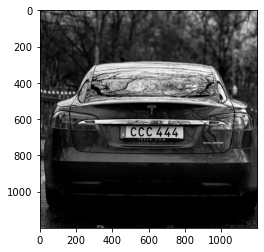

In [2]:
# Read Image

img = cv2.imread("img4.jpg")
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

plt.imshow(cv2.cvtColor(gray, cv2.COLOR_BGR2RGB))

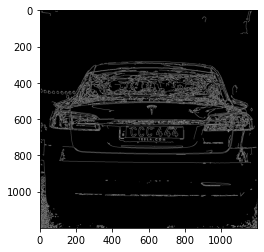

In [3]:
# Filtering and Edge Detection

filtr = cv2.bilateralFilter(gray, 11, 17, 17)
edge = cv2.Canny(filtr, 30, 200)

plt.imshow(cv2.cvtColor(edge, cv2.COLOR_BGR2RGB))

In [4]:
# Contour Detection (Rectangle in this case)

points = cv2.findContours(edge.copy(), cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
contours = imutils.grab_contours(points)
contours = sorted(contours, key=cv2.contourArea, reverse=True)[:10]

In [5]:
axis = None
for contour in contours:
    approx = cv2.approxPolyDP(contour, 10, True)
    if len(approx) == 4:
        axis = approx
        break
axis

array([[[474, 639]],

       [[784, 641]],

       [[789, 703]],

       [[473, 702]]], dtype=int32)

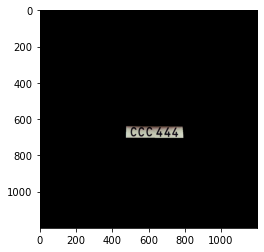

In [6]:
# Masking to isolate the number plate

mask = np.zeros(gray.shape, np.uint8)
new_img = cv2.drawContours(mask, [axis], 0, 255, -1)
new_img = cv2.bitwise_and(img, img, mask=mask)

plt.imshow(cv2.cvtColor(new_img, cv2.COLOR_BGR2RGB))

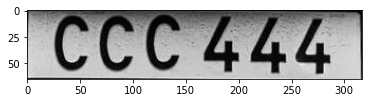

In [7]:
# Crop Image

(x, y) = np.where(mask == 255)
(x1, y1) = (np.min(x), np.min(y))
(x2, y2) = (np.max(x), np.max(y))
crop = gray[x1:x2+1, y1:y2+1]

plt.imshow(cv2.cvtColor(crop, cv2.COLOR_BGR2RGB))
plt.imsave('Cropp.jpg', crop)

In [8]:
# Convert (estimate) Image to Text with easyocr

import easyocr                    #https://pypi.org/project/easyocr/

reader = easyocr.Reader(['en'])
result = reader.readtext(crop)
result

CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


[([[18, 0], [298, 0], [298, 65], [18, 65]], 'CCC 444', 0.7107457676110386)]

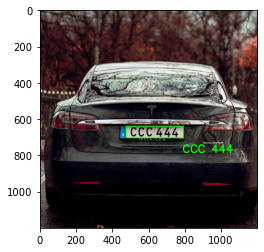

In [9]:
# Display Plate Number on the image

text = result[0][-2][:]
font = cv2.FONT_HERSHEY_SIMPLEX
overlay = cv2.putText(img, text=text, org=(approx[1][0][0], approx[1][0][0]), fontFace= font, fontScale=2, color=(0,255,0), thickness=5, lineType=cv2.LINE_AA)
overlay = cv2.rectangle(img, tuple(approx[0][0]), tuple(approx[2][0]), (0,255,0), 3)

plt.imshow(cv2.cvtColor(overlay, cv2.COLOR_BGR2RGB))